## Imports

In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

### Defining the path for test and train data

In [7]:
import splitfolders

input_folder = 'C:/Users/user/ML1/Plant seedling Classification'
output_folder = 'C:/Users/user/ML1/dataset'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .0, .2))

Copying files: 0 files [00:00, ? files/s]

Copying files: 5539 files [00:43, 127.94 files/s]


In [8]:
import glob

train_length = 0
test_length = 0

for name in glob.glob('C:/Users/user/ML1/dataset/train/*'):
  train_length += len(glob.glob(name+'/*.png'))

for name in glob.glob('C:/Users/user/ML1/dataset/test/*'):
  test_length += len(glob.glob(name+'/*.png'))

print(train_length,test_length)

4426 1113


### Load using keras.preprocessing

### Creating the dataset

In [9]:
batch_size = 32
img_height = 120
img_width = 120

In [10]:
data_dir_train = 'C:/Users/user/ML1/dataset/train'
data_dir_test = 'C:/Users/user/ML1/dataset/test'

In [16]:
# creating train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="training", seed=123,
                                                               image_size=(img_height, img_width), batch_size=batch_size)

Found 4207 files belonging to 11 classes.
Using 3366 files for training.


In [11]:
# creating validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="validation", seed=123,
                                                             image_size=(img_height, img_width), batch_size=batch_size)

Found 4207 files belonging to 11 classes.
Using 841 files for validation.


In [12]:
# Listing out all the classes of plant seedlings and store them in a list.

labels = sorted(os.listdir(data_dir_train))
print(labels)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [13]:
# creating a list which counts the number of images in each class of plant seedling
count_plot = []
for i in labels:
    count_plot.append(len(os.listdir(os.path.join(data_dir_train,i))))

In [ ]:
count_plot

[247, 361, 268, 570, 202, 430, 613, 205, 485, 219, 460, 370]

### Visualizing the data

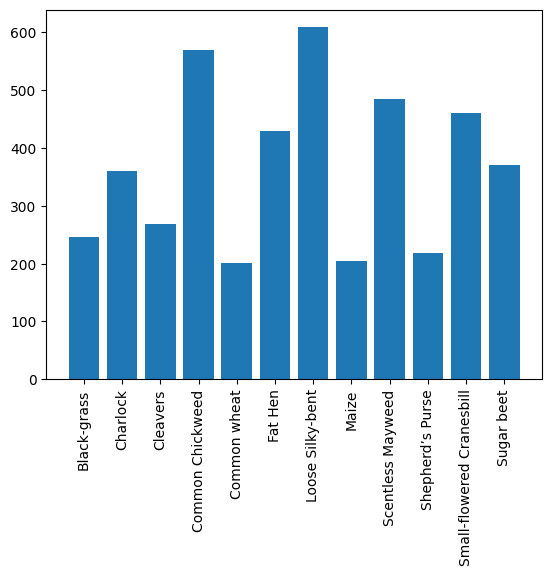

In [14]:
# creating plot for distribution of images in each class
count_plot = np.array(count_plot)
plt.bar(labels, count_plot)
plt.xticks(rotation = 90)
plt.show()

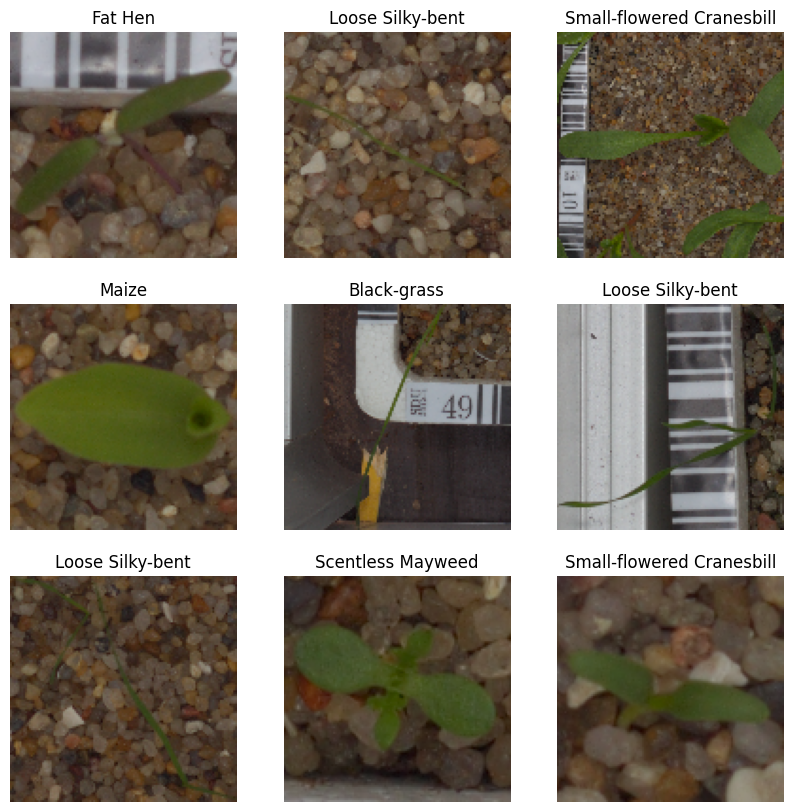

In [17]:
# visualizing few images from the train data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")

## Creating the model

### Model 1
Creating a CNN model, which can accurately detect 12 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [19]:
# specifying image dimensions with RGB channel
input_shape = (120,120,3)
# storing number of classes of plant seedlings in a variable
num_classes = 12

# creating layers for the first model using conv2D
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, offset=0.0, input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
# using batch normalization
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
### Compiling the model
### choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
### Training the model
epochs = 20
batch_size = 32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 100s 942ms/step - accuracy: 0.9785 - loss: 0.0662 - val_accuracy: 0.7907 - val_loss: 1.2979
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 102s 957ms/step - accuracy: 0.9679 - loss: 0.0931 - val_accuracy: 0.5113 - val_loss: 4.1129
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 96s 897ms/step - accuracy: 0.9613 - loss: 0.1551 - val_accuracy: 0.7277 - val_loss: 1.5592
Epoch 4/20
 62/106 ━━━━━━━━━━━━━━━━━━━━ 39s 893ms/step - accuracy: 0.9713 - loss: 0.0919

KeyboardInterrupt: 

In [27]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

#### Results from Model 1
1. The accuracy of the model for the Training data set is at 98%. But the Validation accuracy is not in par with the training accuracy.
It is only at 69%.
2. The validation loss as observed is very high.This could also be indicative of some Overfitting in the model.
3. We could add some Dropout layers and remove the BatchNormalization layers to avoid overfitting to some extent

### Model 2
#### Removing Batch Normalization and Adding Dropouts.
Removing Batch Normalization for this layer and adding dropouts after every hidden layer to avoid overfitting

In [ ]:
input_shape = (120,120,3)
num_classes = 12

model2 = Sequential()
# adding layers for normalizing the images between 0 and 1
model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))
model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(32, kernel_size=(3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))

model2.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))

model2.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.20))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.20))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [ ]:
### compiling the model
### choosing an appropirate optimiser and loss function
opt = Adam(0.001) # specifying the optimizer used for the model
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# specifying the format in which model needs to be saved
model_name = 'Seed2' + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)
 # giving the file path
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-.h5'
# Creating the call back for saving only the best models
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# creating the callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
### training the model and using callback parameter to save the best model
epochs = 50
batch_size = 32
history = model2.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

Epoch 1/50
110/111 [============================>.] - ETA: 0s - loss: 2.4481 - accuracy: 0.1290
Epoch 1: val_loss improved from inf to 2.41363, saving model to Seed2/model-00001-2.44801-2.41363-.h5
111/111 [==============================] - 31s 245ms/step - loss: 2.4480 - accuracy: 0.1292 - val_loss: 2.4136 - val_accuracy: 0.1377
Epoch 2/50
111/111 [==============================] - ETA: 0s - loss: 2.4251 - accuracy: 0.1284
Epoch 2: val_loss did not improve from 2.41363
111/111 [==============================] - 29s 248ms/step - loss: 2.4251 - accuracy: 0.1284 - val_loss: 2.4139 - val_accuracy: 0.1377
Epoch 3/50
111/111 [==============================] - ETA: 0s - loss: 2.3941 - accuracy: 0.1704
Epoch 3: val_loss improved from 2.41363 to 2.15964, saving model to Seed2/model-00003-2.39407-2.15964-.h5
111/111 [==============================] - 28s 242ms/step - loss: 2.3941 - accuracy: 0.1704 - val_loss: 2.1596 - val_accuracy: 0.3081
Epoch 4/50
111/111 [==============================] - E

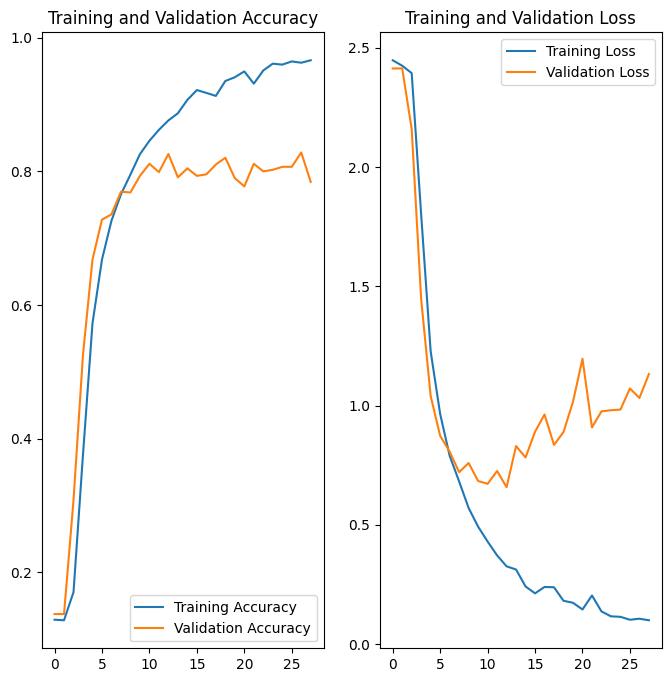

In [ ]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(28)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Results from Model 2
1. The model is performing better than the previous model since there is comparatively less overfitting.
2. Training accuracy of 96% and validation accuracy of 78%.
3. Early Stopping used.
4. Validation loss improved from 2.25 to 1.13

## Model 3
#### Creating a model using data augmetation
1. layers.experimental.preprocessing.RandomFlip() - A preprocessing layer which randomly flips images during training.
2. layers.experimental.preprocessing.RandomRotation() - A preprocessing layer which randomly rotates images during training.

In [ ]:
input_shape = (120,120,3)
num_classes = 12

model_aug = Sequential()
# scaling the images
model_aug.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0))
#layers.experimental.preprocessing.RandomFlip() - A preprocessing layer which randomly flips images during training.
#layers.experimental.preprocessing.RandomRotation() - A preprocessing layer which randomly rotates images during training.
model_aug.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model_aug.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))
model_aug.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(32, kernel_size=(3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
# adding dropout layer after each Maxpooling layer
model_aug.add(Dropout(0.20))

model_aug.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(64, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.20))

model_aug.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(128, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.20))

model_aug.add(Flatten())
model_aug.add(Dense(512))
model_aug.add(Activation('relu'))
model_aug.add(Dropout(0.20))
model_aug.add(Dense(num_classes))
model_aug.add(Activation('softmax'))

In [ ]:
### compiling the augmented model
### choosing an appropirate optimiser and loss function

opt = Adam(0.001)
model_aug.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# spefying the format in which model needs to be saved
model_name = 'Seed3' + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)
 # giving the file path
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-.h5'
# Creating the call back for saving only the best models
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# creating the callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
### training the model
epochs = 100
batch_size = 32
history = model_aug.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list, shuffle=True)

Epoch 1/100
111/111 [==============================] - ETA: 0s - loss: 2.4280 - accuracy: 0.1462
Epoch 1: val_loss improved from inf to 2.36846, saving model to Seed3/model-00001-2.42802-2.36846-.h5
111/111 [==============================] - 33s 242ms/step - loss: 2.4280 - accuracy: 0.1462 - val_loss: 2.3685 - val_accuracy: 0.2540
Epoch 2/100
110/111 [============================>.] - ETA: 0s - loss: 1.7922 - accuracy: 0.3676
Epoch 2: val_loss improved from 2.36846 to 1.46164, saving model to Seed3/model-00002-1.79036-1.46164-.h5
111/111 [==============================] - 31s 266ms/step - loss: 1.7904 - accuracy: 0.3674 - val_loss: 1.4616 - val_accuracy: 0.4797
Epoch 3/100
110/111 [============================>.] - ETA: 0s - loss: 1.3922 - accuracy: 0.5082
Epoch 3: val_loss improved from 1.46164 to 1.10856, saving model to Seed3/model-00003-1.38799-1.10856-.h5
111/111 [==============================] - 29s 250ms/step - loss: 1.3880 - accuracy: 0.5096 - val_loss: 1.1086 - val_accuracy: 

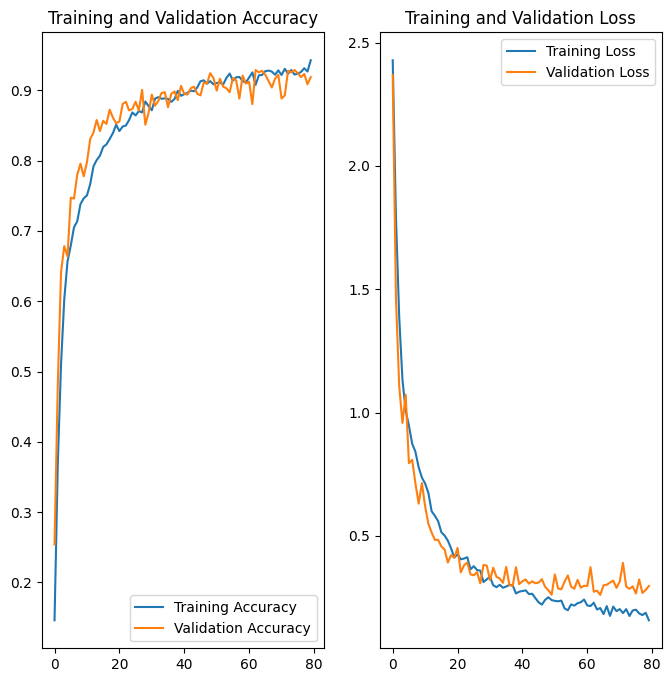

In [ ]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Results from Model 3
1. Including Data Augmentation has improved the model accuracy to 94% and also handled overfitting to great extent.
2. Data Augmentation has improved the model performance.
3. Validation loss have improved from 1.13 to 0.29

## Model 4

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
### defining the path for training and test images
train_path = "/content/dataset/train/"
test_path = "/content/dataset/test/"

In [ ]:
### distibution of classes for each category of data
### It can be seen that data has imbalances in the class distribution
for i in labels:
    directory =train_path + i + '/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.png')))
    print(f'{i} has {length} samples.')

Black-grass has 247 samples.
Charlock has 361 samples.
Cleavers has 268 samples.
Common Chickweed has 570 samples.
Common wheat has 202 samples.
Fat Hen has 430 samples.
Loose Silky-bent has 613 samples.
Maize has 205 samples.
Scentless Mayweed has 485 samples.
Shepherd’s Purse has 219 samples.
Small-flowered Cranesbill has 460 samples.
Sugar beet has 370 samples.


In [ ]:
# You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes
# so that none of the classes have very few samples.
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
path_to_training_dataset=train_path

import Augmentor
for i in labels:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 247 image(s) found.
Output directory set to /content/dataset/train/Black-grass/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1109x1109 at 0x7EB7B441BA60>: 100%|██████████| 500/500 [02:22<00:00,  3.50 Samples/s]


Initialised with 361 image(s) found.
Output directory set to /content/dataset/train/Charlock/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=730x730 at 0x7EB7C6EDF640>: 100%|██████████| 500/500 [01:06<00:00,  7.48 Samples/s]


Initialised with 268 image(s) found.
Output directory set to /content/dataset/train/Cleavers/output.

Processing <PIL.Image.Image image mode=RGB size=190x190 at 0x7EB7DC0B1690>: 100%|██████████| 500/500 [00:27<00:00, 18.07 Samples/s]


Initialised with 570 image(s) found.
Output directory set to /content/dataset/train/Common Chickweed/output.

Processing <PIL.Image.Image image mode=RGB size=411x411 at 0x7EB81B9661D0>: 100%|██████████| 500/500 [00:20<00:00, 23.96 Samples/s]


Initialised with 202 image(s) found.
Output directory set to /content/dataset/train/Common wheat/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=556x556 at 0x7EB7EE3578B0>: 100%|██████████| 500/500 [01:05<00:00,  7.59 Samples/s]


Initialised with 430 image(s) found.
Output directory set to /content/dataset/train/Fat Hen/output.

Processing <PIL.Image.Image image mode=RGB size=431x431 at 0x7EB8502F3790>: 100%|██████████| 500/500 [00:32<00:00, 15.56 Samples/s]


Initialised with 613 image(s) found.
Output directory set to /content/dataset/train/Loose Silky-bent/output.

Processing <PIL.Image.Image image mode=RGB size=1943x1942 at 0x7EB8FA793E50>: 100%|██████████| 500/500 [01:02<00:00,  7.95 Samples/s]


Initialised with 205 image(s) found.
Output directory set to /content/dataset/train/Maize/output.

Processing <PIL.Image.Image image mode=RGB size=852x852 at 0x7EB7CE0B13F0>: 100%|██████████| 500/500 [01:31<00:00,  5.48 Samples/s]


Initialised with 485 image(s) found.
Output directory set to /content/dataset/train/Scentless Mayweed/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=58x58 at 0x7EB85FD8E710>: 100%|██████████| 500/500 [00:22<00:00, 22.36 Samples/s]


Initialised with 219 image(s) found.
Output directory set to /content/dataset/train/Shepherd’s Purse/output.

Processing <PIL.Image.Image image mode=RGB size=925x925 at 0x7EB7B8C8AD40>: 100%|██████████| 500/500 [00:37<00:00, 13.17 Samples/s]


Initialised with 460 image(s) found.
Output directory set to /content/dataset/train/Small-flowered Cranesbill/output.

Processing <PIL.Image.Image image mode=RGB size=116x116 at 0x7EB85FD38100>: 100%|██████████| 500/500 [00:36<00:00, 13.59 Samples/s]


Initialised with 370 image(s) found.
Output directory set to /content/dataset/train/Sugar beet/output.

Processing <PIL.Image.Image image mode=RGB size=1036x1036 at 0x7EB7CF4A7EB0>: 100%|██████████| 500/500 [01:54<00:00,  4.37 Samples/s]


In [ ]:
### Distribution of classes after augmentation
for i in labels:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.png')))
    length_out=len(list(class_directory_out.glob('*.png')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

Black-grass has 747 samples.
Charlock has 861 samples.
Cleavers has 768 samples.
Common Chickweed has 1070 samples.
Common wheat has 702 samples.
Fat Hen has 930 samples.
Loose Silky-bent has 1113 samples.
Maize has 705 samples.
Scentless Mayweed has 985 samples.
Shepherd’s Purse has 719 samples.
Small-flowered Cranesbill has 960 samples.
Sugar beet has 870 samples.


In [ ]:
batch_size = 32
img_height = 120
img_width = 120

In [ ]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10430 files belonging to 12 classes.
Using 8344 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10430 files belonging to 12 classes.
Using 2086 files for validation.


In [ ]:
input_shape = (120,120,3)
num_classes = 12

model4 = Sequential()
model4.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0))
model4.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(32, kernel_size=(3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.10))

model4.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.10))

model4.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(128, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.10))

model4.add(Flatten())
model4.add(Dense(256))
model4.add(Activation('relu'))
model4.add(Dropout(0.25))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

In [25]:
### choosing an appropirate optimiser and loss function
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model4' is not defined

In [ ]:
# spefying the format in which model needs to be saved
model_name = 'Seed4' + '/'

if not os.path.exists(model_name):
    os.mkdir(model_name)
 # giving the file path
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}-.h5'
# Creating the call back for saving only the best models
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=5, verbose=1, mode='max', min_lr=1e-5)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# creating the callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

callbacks_list = [checkpoint, early_stopping, lr_reduce]

In [24]:
### training the model
epochs = 100
batch_size = 32
history = model4.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

NameError: name 'model4' is not defined

In [22]:
### visualizing the model results.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(14)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

#### Analysis of the result from Model 4
- Accuracy on validation data has increased to around 96% by using Augmentor library of Python
- Model is much less overfitting compared to previous models
- The above model can be further improved by tuning the hyperparameters.
- Validation loss is also less = 0.38